In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
df = pd.read_csv(r'C:\Users\mhija\Desktop\new things\DATA\mushrooms.csv')
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [3]:
X =df.drop('class',axis=1)
X = pd.get_dummies(X,drop_first=True).astype(int)
y = df['class']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
          X, y, test_size=0.15, random_state=42)

In [5]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators':[50,100],
              'learning_rate':[0.1,0.05,0.2],
              'max_depth':[3,4,5]}

gb_model = GradientBoostingClassifier()

grid_model = GridSearchCV(gb_model,param_grid)


In [6]:
grid_model.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [7]:
grid_model.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}

In [8]:
from sklearn.metrics import classification_report, accuracy_score,ConfusionMatrixDisplay,confusion_matrix
ypred = grid_model.predict(X_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       637
           p       1.00      1.00      1.00       582

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [9]:
feat = grid_model.best_estimator_.feature_importances_

In [13]:
featdf = pd.DataFrame(index=X.columns , data=feat , columns=['importance'])
featdf

,importance
cap-shape_c,6.102044e-04
cap-shape_f,0.000000e+00
cap-shape_k,0.000000e+00
cap-shape_s,0.000000e+00
cap-shape_x,2.289550e-15
...,...
habitat_l,7.069595e-06
habitat_m,1.360385e-16
habitat_p,0.000000e+00
habitat_u,2.468446e-17


In [15]:
less = featdf[featdf['importance']>0.0005].sort_values('importance')


<Axes: xlabel='importance', ylabel='None'>

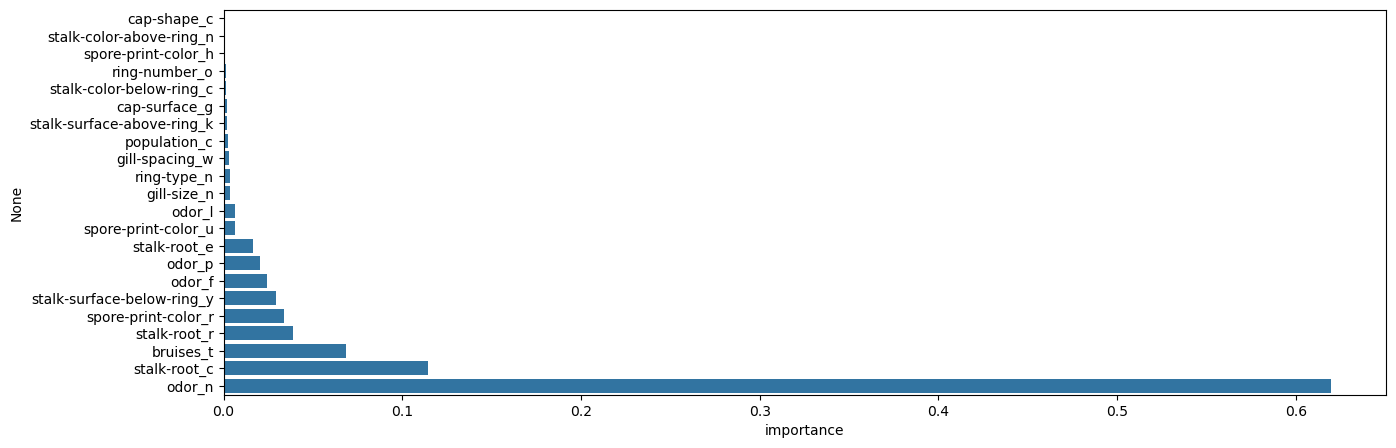

In [21]:
plt.figure(figsize=(15,5))
sns.barplot(data=less , x='importance' , y=less.index)
#plt.xticks(rotation =90);